In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import *
import copy

In [2]:
matdat = sio.loadmat('denoising_codeChallenge.mat')

cleanedSignal = matdat['cleanedSignal']
origSignal = matdat['origSignal']

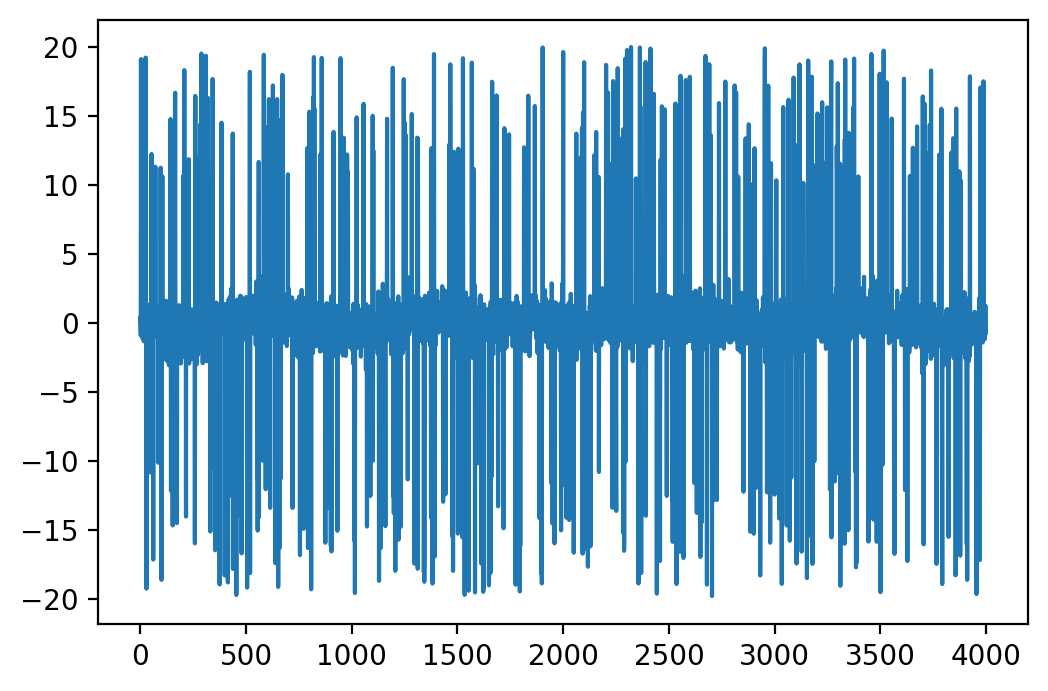

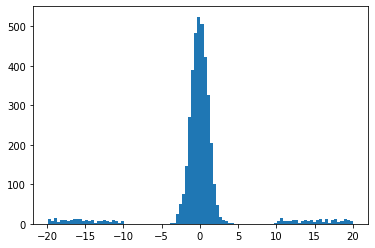

In [3]:
origShape = np.shape(origSignal)
origSignalActual = origSignal[0]
n = origShape[1]

plt.figure().set_dpi(200)
plt.plot(origSignalActual)
plt.show()
plt.hist(origSignalActual,100)
plt.show()

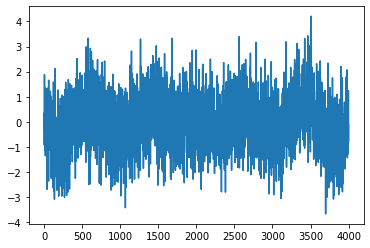

In [4]:

lowerThreshold = -5
upperThreshold = 7
k = 20

outsideThresholdUp = np.where(origSignalActual > upperThreshold)
outsideThresholdDown = np.where(origSignalActual < lowerThreshold)

outsideThreshold = np.concatenate([outsideThresholdUp[0],outsideThresholdDown[0]])

newSignal = copy.deepcopy(origSignalActual)

for index in range(0, np.shape(outsideThreshold)[0]):
    lowbnd = np.max((0,outsideThreshold[index]-k))
    uppbnd = np.min((outsideThreshold[index]+k,n+1))
    
    newSignal[outsideThreshold[index]] = np.median(origSignalActual[lowbnd:uppbnd])

plt.plot(newSignal)
plt.show()

In [5]:
fwhm = 80
k = 100
gtime = np.arange(-k,k)
gauswin = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 )
gauswin = gauswin / np.sum(gauswin)

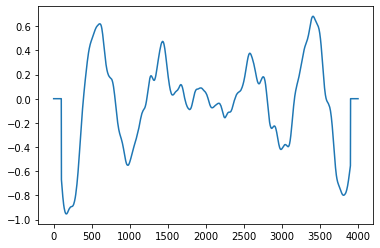

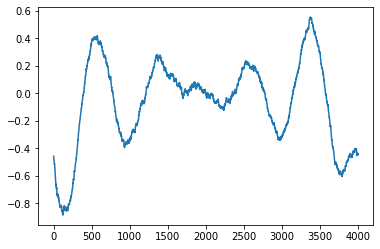

In [6]:
filtsig = np.zeros(n)

for i in range(k+1,n-k):

    sum = np.sum( newSignal[i-k:i+k]*gauswin )
    filtsig[i] = sum

plt.plot(filtsig)
plt.show()
plt.plot(cleanedSignal[0])
plt.show()

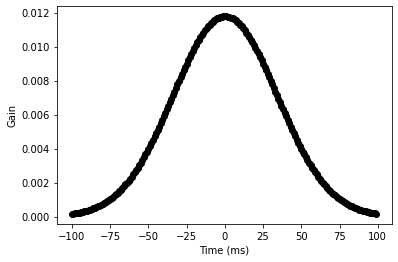

In [7]:


# compute empirical FWHM
pstPeakHalf = k + np.argmin( (gauswin[k:]-.5)**2 )
prePeakHalf = np.argmin( (gauswin-.5)**2 )

empFWHM = gtime[pstPeakHalf] - gtime[prePeakHalf]

# show the Gaussian
plt.plot(gtime,gauswin,'ko-')
plt.plot([gtime[prePeakHalf],gtime[pstPeakHalf]],[gauswin[prePeakHalf],gauswin[pstPeakHalf]],'m')

# then normalize Gaussian to unit energy
gauswin = gauswin / np.sum(gauswin)
# title([ 'Gaussian kernel with requeted FWHM ' num2str(fwhm) ' ms (' num2str(empFWHM) ' ms achieved)' ])
plt.xlabel('Time (ms)')
plt.ylabel('Gain')

plt.show()

